In [26]:
from IPython.display import Image 
%matplotlib inline

In [8]:
Image(url="http://www.kdnuggets.com/wp-content/uploads/data-science-process.jpg")

Ahi, entre la exploración y el modelo de datos, está Feature Engineering. Que nos permite saltar de los datos tal y como los tenemos a datos más ricos para la generación de modelos.

# La motivación para ser selectivo

http://blog.kaggle.com/2014/08/01/learning-from-the-best/ 

Hay dos definiciones que nos motivan a encontrar modelos entrenados con la menor cantidad de variables

## The curse of Dimensionality
- https://www.youtube.com/watch?v=QZ0DtNFdDko
- https://www.youtube.com/watch?v=OyPcbeiwps8

## The Bias and Variance Tradeoff

In [6]:
Image(url='http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png')

### ¿Cómo se vería un modelo con alto sezgo (Bias), y uno con alta varianza?

- ** Alto Bias ** : Pone poca atención a los datos, y tiene un alto potencial de error al entrenar el modelo.
- ** Alta varianza ** : Pone mucha atención a los datos (concentrandose en los datos que se usa para entrenar el modelo) y da lugar a más error al probar el modelo.

### ¿Cómo cambian la varianza y el sezgo(Bias) con respecto a la cantidad de variables consideradas por un modelo?

- **A mayor cantidad de variables**, el Bias va disminuyendo, ya que el modelo es más general y va tomando menos en cuenta la distinción de ellas.
- **A mayor cantidad de variables**, la varianza va aumentando, por lo que el impacto en el error va aumentando por la cantidad de ruido que le mete cada variable extra

Más información: http://scott.fortmann-roe.com/docs/BiasVariance.html

# Feature Engineering

*Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.*

Con esta definición, surgen varias dependencias:
- ¿Cómo medimos cuales son buenas features?
- ¿Cuál es el planteamiento del problema?
- ¿Qué modelo vamos a usar?
- Los datos que estás usando

### ¿Para que lo hacemos?
- ** Por flexibilidad**: Puedes equivocarte de modelo y obtener buenos resutlados. Buenas features te permiten usar modelos menos complejos y fáciles de mantener.
- ** Para modelos más simples**: Con buenas features, estás más cerca del problema detrás y por lo tanto, de describir el modelo que mejor lo describe.
- ** Para mejores resultados **: Con buen preprocesamiento, tus resultados van a ser más útiles

*…some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used.*  -   Pedro Domingos, Autor de “A Few Useful Things to Know about Machine Learning”

## ¿ Pero qué es una Feature?

- Los datos tabulares están descritos como observaciones o instancias (filas) que están construidas por variables o atributos (columnas). Las features son atributos.
- Pero las features, a diferencias de los atributos, tienen mucho más sentido en el contexto del problema. Un feature es un atributo que es util o que tiene significado en el contexto. 
- Una imagen para un problema de visión computacional, es una observacion. Pero una feature podría ser una linea. Para un proyecto de lenguaje, la observacion podría ser un tweet, mientras que una feature podría ser una frase o palabras.

## ¿ Qué vamos a aprender de Feature Engineering?
- ** Feature Selection, de muchas features, quedarnos con unas pocas **: No todas las features son iguales. Feature selection nos permite encontrar el set de features más útiles para nuestro problema.
- ** Feature Exctraction, la construcción de nuevas features de datos crudos **: Algunas observaciones tienen que pasar un proceso para identificar las features que nos interesan para modelar. Ya mencionamos algunas de ellas, pero buscaremos disminuir la dimensionalidad de estos tipos de observaciones (Video, audio, imagenes), en un set más pequeño que puede modelarse

# Feature Selection

Los dos objetivos de feature selection son:
- Reducer el número de features, para reducir overfitting y mejorar la generalización de los modelos.
- Para tener un mejor entendimeinto sobre las features y su relación a las variables de respuestas.

## Remover features con baja varianza. 

Una variable con una varianza muy baja, trae poca información a la mesa. El primer corte por ahi puede suceder

In [11]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

Esto remueve la primera columna, que tiene una probabilidad de 5/6 de contener un cero. Tons Cortón.

## Selección univariada de Features
Este proceso es el de evaluar cada feature individualmente para determinar el poder de su relación con la variable de respuesta. Son simples y rpaidos para encontrar mejor sentido de la información. 

### Pearson Correlation

Uno de los métodos más simples es encontrar la relación lineal entre dos variables.  Los valores van de [-1 a 1], donde -1 es una relación negativa perfecta y 1 para una relación lineal. Es muy fácil hacerlo con Scipy

In [15]:
import numpy as np
from scipy.stats import pearsonr
np.random.seed(0)
size = 300
x = np.random.normal(0, 1, size)
print("Lower noise", pearsonr(x, x + np.random.normal(0, 1, size)))
print("Higher noise", pearsonr(x, x + np.random.normal(0, 10, size)))

Lower noise (0.71824836862138408, 7.3240173129983507e-49)
Higher noise (0.057964292079338155, 0.31700993885324752)


Comparemos la versión con ruido y sin riudo. Con menor riudo el p valor es mucho menor y más con mayor. 

Por supuesto, la limitación de este paso es cuando la relación está lejos de la linealidad. Por ejemplo:

In [16]:
x = np.random.uniform(-1, 1, 100000)
print(pearsonr(x, x**2)[0])

-0.00230804707612


https://en.wikipedia.org/wiki/Anscombe%27s_quartet

## Mutual information and maximal information coefficient (MIC)

Otra opción, más robusta para encontrar correlación es:

In [17]:
Image(url="https://wikimedia.org/api/rest_v1/media/math/render/svg/6a75f80322072168ff9ecb8cde63cca5aa9218e1")

Lo cual mide la dependencia entre variables. El cual luego es usado en su formato de https://en.wikipedia.org/wiki/Maximal_information_coefficient

In [19]:
from minepy import MINE
m = MINE()
x = np.random.uniform(-1, 1, 10000)
m.compute_score(x, x**2)
print(m.mic())

1.0000000000000002


Hay otras alternativas para medir esto, como la distancia. Para más información: http://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html#example-feature-selection-plot-feature-selection-py

### Chi^2 para features de clase (variables categóricas)

El test de Chi^2 mide la dependencia entre dos variables estocásticas. Por lo tanto, por medio de este proceso, podemos quedarnos con aquellos conceptos que son relevantes

In [20]:
Image(url="http://4.bp.blogspot.com/-Qt9tqp0av00/UwZJe0Dp3TI/AAAAAAAAAxs/XeIN2N8wPnY/s1600/chi-square.png")

http://glowingpython.blogspot.mx/2014/02/terms-selection-with-chi-square.html

In [21]:
from sklearn.datasets import fetch_20newsgroups
 # newsgroups categories
categories = ['alt.atheism','talk.religion.misc',
              'comp.graphics','sci.space']

posts = fetch_20newsgroups(subset='train', categories=categories,
                           shuffle=True, random_state=42,
                           remove=('headers','footers','quotes'))

/usr/local/lib/python3.4/site-packages/sklearn/datasets/twenty_newsgroups.py:89: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  logger.warn("Downloading dataset from %s (14 MB)", URL)


De los posts que se cargan, generamos un modelo lineal con los terminos de la colección sin las palabras extras (stop words)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase=True,stop_words='english')
X = vectorizer.fit_transform(posts.data)

Ahora X es una matriz de documentos donde el elemento Xi,j es la frecuencia del termino j en el documento i. Ahora, las features estan dadas por las columnas de X y queremos calcular Chi^2 entre las categorias de interés y cada feature para encontrar los terminos más relevantes.

In [23]:
from sklearn.feature_selection import chi2
# compute chi2 for each feature
chi2score = chi2(X,posts.target)[0]

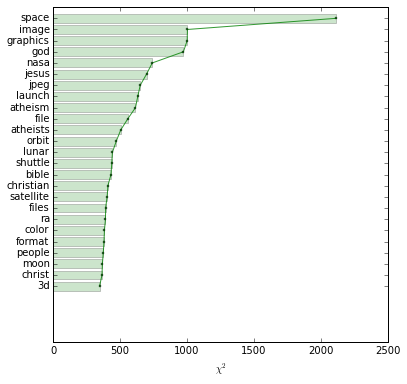

In [27]:
from pylab import barh,plot,yticks,show,grid,xlabel,figure
figure(figsize=(6,6))
wscores = list(zip(vectorizer.get_feature_names(),chi2score))
wchi2 = sorted(wscores,key=lambda x:x[1]) 
topchi2 = list(zip(*wchi2[-25:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
barh(x,topchi2[1],align='center',alpha=.2,color='g')
plot(topchi2[1],x,'-o',markersize=2,alpha=.8,color='g')
yticks(x,labels)
xlabel('$\chi^2$')
show()

En este caso, los terminos de spacio, nasa y launch son determinantes para la categoria sci.space. Para god, jesus y atheism es relevante para alt.atheism, e image, graphics y jpeg es relevante para comp.graphics.

### Ranking basado en Modelo.

Uno puede usar un modelo de aprendizaje automático arbirtario para construir un modelo predictivo para la variable de respuesta a cada feature individual para medir el performance del modelo. 

Se puede empezar, por ejemplo, con un modelo lineal. Pero si no es suficiente, hay algunas alternativas, como los métodos de arboles de decisión. Se debe de cuidar de overfitting, y esto se hace con una profundidad de arboles corta y crossvalidation. 

In [29]:
from sklearn.cross_validation import cross_val_score, ShuffleSplit
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
 
#Load boston housing dataset as an example
boston = load_boston()
X = boston["data"]
Y = boston["target"]
names = boston["feature_names"]
 
rf = RandomForestRegressor(n_estimators=20, max_depth=4)
scores = []
for i in range(X.shape[1]):
     score = cross_val_score(rf, X[:, i:i+1], Y, scoring="r2",
                              cv=ShuffleSplit(len(X), 3, .3))
     scores.append((round(np.mean(score), 3), names[i]))
print(sorted(scores, reverse=True))

[(0.60999999999999999, 'LSTAT'), (0.44700000000000001, 'RM'), (0.35599999999999998, 'NOX'), (0.309, 'INDUS'), (0.28899999999999998, 'PTRATIO'), (0.23999999999999999, 'TAX'), (0.23100000000000001, 'ZN'), (0.19900000000000001, 'CRIM'), (0.19, 'RAD'), (0.11600000000000001, 'B'), (0.091999999999999998, 'AGE'), (0.048000000000000001, 'DIS'), (0.010999999999999999, 'CHAS')]


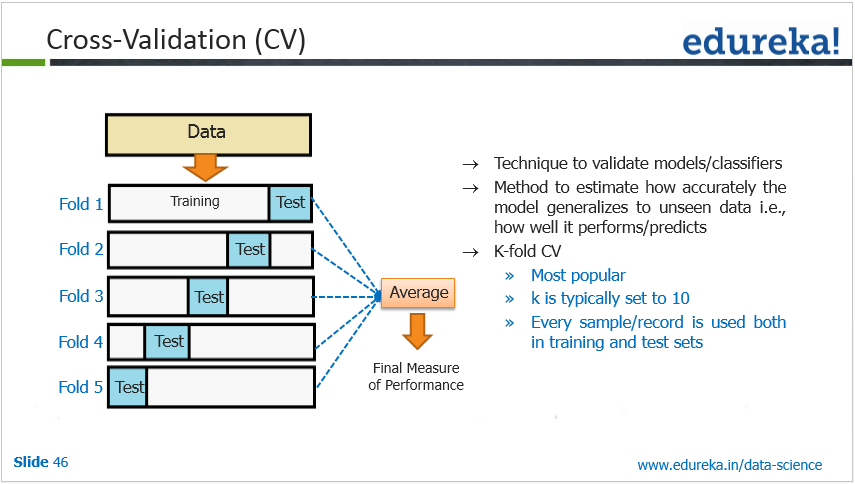

In [30]:
Image("http://www.edureka.co/blog/wp-content/uploads/2015/01/bc81.png")

## Usando modelos Lineales para encontrar relación entre variables

In [32]:
from sklearn.linear_model import LinearRegression
import numpy as np
 
np.random.seed(0)
size = 5000
 
#A dataset with 3 features
X = np.random.normal(0, 1, (size, 3))
#Y = X0 + 2*X1 + noise
Y = X[:,0] + 2*X[:,1] + np.random.normal(0, 2, size)
lr = LinearRegression()
lr.fit(X, Y)
 
#A helper method for pretty-printing linear models
def pretty_print_linear(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = list(zip(coefs, names))
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)
 
print("Linear model:", pretty_print_linear(lr.coef_))

Linear model: 0.984 * X0 + 1.995 * X1 + -0.041 * X2


Se debe de tener cuidado, porque esta visión puede estar limitada por codependencia (La cual puede ser atacada previamente)

Para evitar overfitting, se puede agregar una función de penalización. L1(Lasso) y L2(Ridge) usan fuciones que dan lugar a descartar relaciones débiles
http://stats.stackexchange.com/a/4993/112231

In [36]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
  
boston = load_boston()
scaler = StandardScaler()
X = scaler.fit_transform(boston["data"])
Y = boston["target"]
names = boston["feature_names"]
  
lasso = Lasso(alpha=.3)
lasso.fit(X, Y)
  
print("Lasso model: ", pretty_print_linear(lasso.coef_, names, sort =  True))


Lasso model:  -3.707 * LSTAT + 2.992 * RM + -1.757 * PTRATIO + -1.081 * DIS + -0.7 * NOX + 0.631 * B + 0.54 * CHAS + -0.236 * CRIM + 0.081 * ZN + -0.0 * INDUS + -0.0 * AGE + 0.0 * RAD + -0.0 * TAX


/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:16: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [39]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
size = 100
 
#We run the method 10 times with different random seeds
for i in range(10):
    print("Random seed %s" % i)
    np.random.seed(seed=i)
    X_seed = np.random.normal(0, 1, size)
    X1 = X_seed + np.random.normal(0, .1, size)
    X2 = X_seed + np.random.normal(0, .1, size)
    X3 = X_seed + np.random.normal(0, .1, size)
    Y = X1 + X2 + X3 + np.random.normal(0, 1, size)
    X = np.array([X1, X2, X3]).T
 
 
    lr = LinearRegression()
    lr.fit(X,Y)
    print("Linear model:", pretty_print_linear(lr.coef_))
 
    ridge = Ridge(alpha=10)
    ridge.fit(X,Y)
    print("Ridge model:", pretty_print_linear(ridge.coef_))
    print()
#Para demostrar la estabilidad de L2 con respecto a L1

Random seed 0
Linear model: 0.728 * X0 + 2.309 * X1 + -0.082 * X2
Ridge model: 0.938 * X0 + 1.059 * X1 + 0.877 * X2

Random seed 1
Linear model: 1.152 * X0 + 2.366 * X1 + -0.599 * X2
Ridge model: 0.984 * X0 + 1.068 * X1 + 0.759 * X2

Random seed 2
Linear model: 0.697 * X0 + 0.322 * X1 + 2.086 * X2
Ridge model: 0.972 * X0 + 0.943 * X1 + 1.085 * X2

Random seed 3
Linear model: 0.287 * X0 + 1.254 * X1 + 1.491 * X2
Ridge model: 0.919 * X0 + 1.005 * X1 + 1.033 * X2

Random seed 4
Linear model: 0.187 * X0 + 0.772 * X1 + 2.189 * X2
Ridge model: 0.964 * X0 + 0.982 * X1 + 1.098 * X2

Random seed 5
Linear model: -1.291 * X0 + 1.591 * X1 + 2.747 * X2
Ridge model: 0.758 * X0 + 1.011 * X1 + 1.139 * X2

Random seed 6
Linear model: 1.199 * X0 + -0.031 * X1 + 1.915 * X2
Ridge model: 1.016 * X0 + 0.89 * X1 + 1.091 * X2

Random seed 7
Linear model: 1.474 * X0 + 1.762 * X1 + -0.151 * X2
Ridge model: 1.018 * X0 + 1.039 * X1 + 0.901 * X2

Random seed 8
Linear model: 0.084 * X0 + 1.88 * X1 + 1.107 * X2
Ridg

### Metodos con Random Forests

Vamos a ver más a detalle lo que son los random forest, pero en pocas palabras, se refieren a general una cantidad de arboles de decisión

Cada nodo, es una condición que reside en una sola feature, intentando dividir los datasets en dos para  encontrar las respuestas similares en una sola clasificación. La medida con la que se mide este proceso se le llama impureza: que viene de los temas vistos antes de ganancia de información y varianza. 

#### Mean decrease impurity

Uno puede medir cual es la importancia de una variable por lo que logra disminuir la impureza de los arboles. 

In [42]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
import numpy as np
#Load boston housing dataset as an example
boston = load_boston()
X = boston["data"]
Y = boston["target"]
names = boston["feature_names"]
rf = RandomForestRegressor()
rf.fit(X, Y)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))

Features sorted by their score:
[(0.41070000000000001, 'RM'), (0.3805, 'LSTAT'), (0.083400000000000002, 'DIS'), (0.0309, 'CRIM'), (0.021999999999999999, 'PTRATIO'), (0.020299999999999999, 'NOX'), (0.0149, 'AGE'), (0.010800000000000001, 'TAX'), (0.0089999999999999993, 'RAD'), (0.0080000000000000002, 'B'), (0.0077000000000000002, 'INDUS'), (0.0011000000000000001, 'ZN'), (0.00059999999999999995, 'CHAS')]


#### Mean decrease accuracy

En este metodo, se permutan los valores de cada feature para medir que tanto aumenta o disminuye la precisión del árbol, juzgando así su importancia.

In [45]:
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import r2_score
from collections import defaultdict
 
X = boston["data"]
Y = boston["target"]
 
rf = RandomForestRegressor()
scores = defaultdict(list)
 
#crossvalidate the scores on a number of different random splits of the data
for train_idx, test_idx in ShuffleSplit(len(X), 100, .3):
    X_train, X_test = X[train_idx], X[test_idx]
    Y_train, Y_test = Y[train_idx], Y[test_idx]
    r = rf.fit(X_train, Y_train)
    acc = r2_score(Y_test, rf.predict(X_test))
    for i in range(X.shape[1]):
        X_t = X_test.copy()
        np.random.shuffle(X_t[:, i])
        shuff_acc = r2_score(Y_test, rf.predict(X_t))
        scores[names[i]].append((acc-shuff_acc)/acc)
print("Features sorted by their score:")
print(sorted([(round(np.mean(score), 4), feat) for
              feat, score in scores.items()], reverse=True))

Features sorted by their score:
[(0.7681, 'LSTAT'), (0.56599999999999995, 'RM'), (0.089599999999999999, 'DIS'), (0.039899999999999998, 'NOX'), (0.034599999999999999, 'CRIM'), (0.0218, 'PTRATIO'), (0.016299999999999999, 'TAX'), (0.0118, 'AGE'), (0.0064999999999999997, 'B'), (0.0044999999999999997, 'RAD'), (0.0044999999999999997, 'INDUS'), (0.00050000000000000001, 'CHAS'), (0.00020000000000000001, 'ZN')]


Lo que significa que LSTAT y RM impactan bastante al modelo: Disminuyendo su performance de 73 y 57% respectivamente

### Stability Selection

En este metodo, se utilizan submuestras con una serie de algoritmos. De esta manera, se prueba la efectividad del metodo de seleccion a distintos compoenntes de datos. 

In [47]:
from sklearn.linear_model import RandomizedLasso
from sklearn.datasets import load_boston
boston = load_boston()
 
#using the Boston housing data. 
#Data gets scaled automatically by sklearn's implementation
X = boston["data"]
Y = boston["target"]
names = boston["feature_names"]
 
rlasso = RandomizedLasso(alpha=0.025)
rlasso.fit(X, Y)
 
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rlasso.scores_), 
                 names), reverse=True))

/usr/local/lib/python3.4/site-packages/sklearn/linear_model/randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
/usr/local/lib/python3.4/site-packages/sklearn/linear_model/randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
/usr/local/lib/python3.4/site-packages/sklearn/linear_model/randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
/usr/local/lib/python3.4/site-packages/sklearn/linear_model/randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
/usr/local/lib/python3.4/site-packages/sklearn/linear_model/randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resamplin

Features sorted by their score:
[(1.0, 'RM'), (1.0, 'PTRATIO'), (1.0, 'LSTAT'), (0.66500000000000004, 'B'), (0.57999999999999996, 'CHAS'), (0.36499999999999999, 'TAX'), (0.34999999999999998, 'CRIM'), (0.245, 'DIS'), (0.19500000000000001, 'NOX'), (0.11, 'INDUS'), (0.055, 'ZN'), (0.025000000000000001, 'AGE'), (0.014999999999999999, 'RAD')]


/usr/local/lib/python3.4/site-packages/sklearn/linear_model/randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
/usr/local/lib/python3.4/site-packages/sklearn/linear_model/randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
/usr/local/lib/python3.4/site-packages/sklearn/linear_model/randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
/usr/local/lib/python3.4/site-packages/sklearn/linear_model/randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
/usr/local/lib/python3.4/site-packages/sklearn/linear_model/randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resamplin

Features sorted by their score:
[(1.0, 'RM'), (1.0, 'PTRATIO'), (1.0, 'LSTAT'), (0.66500000000000004, 'B'), (0.57999999999999996, 'CHAS'), (0.36499999999999999, 'TAX'), (0.34999999999999998, 'CRIM'), (0.245, 'DIS'), (0.19500000000000001, 'NOX'), (0.11, 'INDUS'), (0.055, 'ZN'), (0.025000000000000001, 'AGE'), (0.014999999999999999, 'RAD')]

#### Recursive Feature elimination

En este metodo, se prueba con un modelo la mejor de las variables, y se elimina del proceso. Se prueba el modelo con las nuevas features y se repite el proceso de eliminación. Y se va Rankeando con respecto al momento que salieron del proceso.

In [49]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

boston = load_boston()
X = boston["data"]
Y = boston["target"]
names = boston["feature_names"]

#use linear regression as the model
lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X,Y)

print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))

Features sorted by their rank:
[(1, 'NOX'), (2, 'RM'), (3, 'CHAS'), (4, 'PTRATIO'), (5, 'DIS'), (6, 'LSTAT'), (7, 'RAD'), (8, 'CRIM'), (9, 'INDUS'), (10, 'ZN'), (11, 'TAX'), (12, 'B'), (13, 'AGE')]


## Ahora te toca a ti. 

https://archive.ics.uci.edu/ml/datasets/Iris

In [55]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

In [81]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:
    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================
    :Missing Attribute Values: None
    

In [78]:
headers = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

In [79]:
import pandas as pd
data_df =pd.DataFrame(X, columns=headers)
class_df = pd.DataFrame(y,columns=["Class"])
iris_df = pd.concat([data_df,class_df], axis=1)
iris_df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [82]:
# Explora el dataset

In [84]:
# Aplica los metodos que vimos para elegir las mejores variables que podrían relacionarse con clasificar las flores.

### Fuentes

https://upload.wikimedia.org/wikipedia/commons/b/bf/Feature_selection_Embedded_Method.png
http://machinelearningmastery.com/an-introduction-to-feature-selection/
	http://scikit-learn.org/stable/modules/feature_selection.html
https://archive.ics.uci.edu/ml/datasets/Iris

### Para saber más

http://radar.oreilly.com/2014/06/streamlining-feature-engineering.html
http://conferences.oreilly.com/strata/strata2012/public/schedule/detail/22489

Thoughtful Machine Learning, A Test-Driven Approach